# Face Recognition using T3f



## Introduction
In this project, we explore the realm of face recognition leveraging advanced techniques such as Tensor Train Decomposition (TTD). Our objective is to develop a robust face recognition system capable of accurately identifying individuals from facial images while optimizing its performance using TTD.

Tensor Train Decomposition (TTD) is a powerful technique for representing and analyzing high-dimensional data. It decomposes a tensor into a series of smaller, lower-dimensional tensors known as cores. By building a face recognition system using TTD and optimizing its performance through TT rank truncation strategies, we aim to demonstrate the effectiveness of this approach in handling high-dimensional data efficiently.

### Tensor Train Decomposition
Tensor Train Decomposition is a powerful technique for representing and analyzing high-dimensional data. It decomposes a tensor into a series of smaller, lower-dimensional tensors known as cores. These cores capture the essential information contained within the original tensor while significantly reducing its size and complexity. TTD has found applications in various fields, including signal processing, image analysis, and machine learning.

By leveraging TTD and employing rank truncation strategies, we can optimize our face recognition system, improve computational efficiency, and reduce memory requirements. This allows us to achieve accurate and efficient face recognition performance, making it suitable for real-world applications.

### Objective
In this project, our objective is to build a face recognition system using Tensor Train Decomposition and optimize its performance by employing TT rank truncation strategies. By leveraging TTD and rank truncation, we aim to develop a face recognition system that is both accurate and computationally efficient, demonstrating the potential of TTD in enhancing AI applications.

### About T3f

T3f is a python library for working with Tensor Train decomposition. Tensor Train decomposition is a generalization of the low-rank decomposition from matrices to tensors (=multidimensional arrays), i.e. it’s a tool to efficiently work with structured tensors. t3f is implemented on top of TensorFlow.

In [1]:
#import required modules
import trainingModule as tm
import classificationModule as cm

## Training

In [2]:
datasetName = "orl"
rank = 50
tt_output = tm.trainingModel(datasetName, rank, info=True)

DATASET INFO: 
 -> No of pixels in each image:  5600
 -> No of subjects:  40
 -> No of images of each subject:  8


_________________________________________


Array of images has been successfully converted to a tensor using TensorFlow!
Size of the image tensor:  (5600, 8, 40)


_________________________________________


Training completed!
Time taken to train the model:  0.1830550000000004


## Testing

In [3]:
accuracy, time = cm.classificationModel(tt_output, info=True)

TESTING T3F FR MODEL.....
Size of test dataset:  80


_________________________________________


Training Completed!


_________________________________________


Accuracy of the T3F model:  0.95
Average CPU time to classify an unknown image:  0.43987768749999995


## Impact of Truncation on Accuracy and Computational Efficiency

The truncation of ranks in tensor decompositions has a significant impact on both the accuracy of the model and the computational resources required. By randomly generating ranks ranging from 1 to the maximum rank allowed, we can observe how the truncation affects these aspects. Lower ranks result in a more compressed representation of the data, reducing the model's capacity to capture intricate patterns and potentially leading to a decrease in accuracy. However, this reduction in rank also leads to computational benefits, such as reduced memory consumption and faster computation times. Conversely, higher ranks offer a more expressive representation of the data, potentially enhancing accuracy but requiring more computational resources. Thus, the choice of truncation rank involves a trade-off between model complexity, accuracy, and computational efficiency, highlighting the importance of empirically evaluating different truncation strategies to achieve the desired balance.

In [4]:
import matplotlib.pyplot as plt

def plot_accuracy_time(x, y1, y2):
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.plot(x, y1)
    plt.title('Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(x, y2)
    plt.title('Training Time')

    plt.show()   

In [5]:
random_ranks = [1, 5, 10, 20, 50, 75, 100, 140, 185, 200, 250, 290, 320]
Accuracy = []
train_time = []
for i in range(len(random_ranks)):
    output_1 = tm.trainingModel("orl", random_ranks[i], info=False)
    output_2 = cm.classificationModel(output_1, info=False)
    Accuracy.append(output_2[0])
    train_time.append(output_1[4])


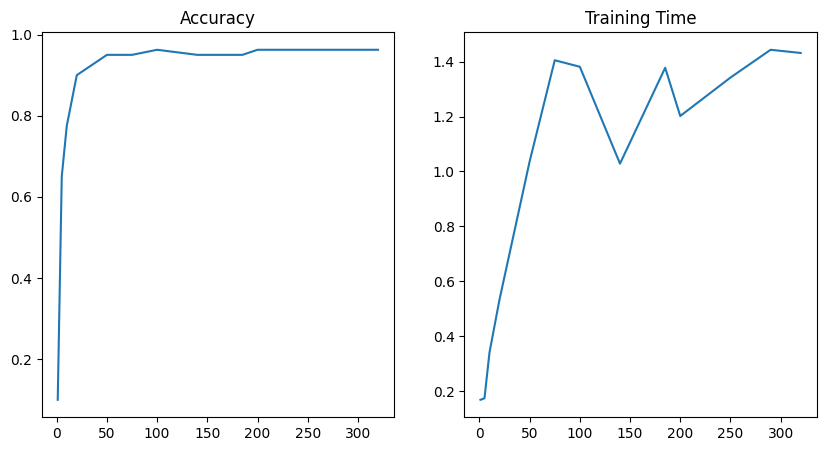

In [6]:
plot_accuracy_time(random_ranks, Accuracy, train_time)

This plot suggests that as the rank of the tensor decomposition increases, both the accuracy and computational time also tend to increase. Initially, with lower ranks, the accuracy is relatively low but increases rapidly as the rank grows, reaching a peak accuracy of around 96.25% at a rank of 100. Beyond this point, the accuracy plateaus, indicating diminishing returns in accuracy improvement with further rank increase. Similarly, the computational time also increases with higher ranks, suggesting that higher rank decompositions require more computational resources. 